# FOMC Sentiment and Relation to Leading Market Indicators 

In [62]:
import statistics
import pandas
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats            # Basic package for basic univariate regressions
import statsmodels.api as statsmod           # More sophisticated package for univariate and multivariate regressions

## <span style="color:blue"> Part 1. FOMC Minutes</span> 

<b>Background:</b> The Federal Open Market Committee (FOMC), a committee within the Federal Reserve System, is charged under United States law with overseeing the nation's open market operations. This Federal Reserve committee makes key decisions about interest rates and the growth of the United States money supply. Committee members meet regularly (typically once a month or once every other month) to make these decisions. Their meeting minutes are made public shortly after the meeting. 

<b>Goal:</b> This project aims to (a) measure and quantify central bankers' $\textit{positive}$ and $\textit{negative}$ sentiment expressed during these high-level meetings, and then (b) examine how the two sentiment measures evolve over time on a $\textit{yearly}$ basis. Finally, we will examine what other factors contribute to negative (positive) market sentiment (see Part 2).

This data spans from 02/1990 to 03/2020

#### To create a "negative" sentiment score of the FOMC meeting on February 7, 1990, we used the following equation: $\mbox{NegativeScore}_{19900207} = \frac{Counts of Negative Words_{19900207}}{Total Word Counts_{19900207}}\times 100$, where file "LM_negative.txt" provides a collection of negative words suggesed by Loughran and McDonald (https://sraf.nd.edu/textual-analysis/resources/). 

#### Similarly, we can create a "positive" sentiment score of the FOMC meeting on February 7, 1990, using the following equation: $\mbox{PositiveScore}_{19900207} = \frac{Counts of Positive Words_{19900207}}{Total Word Counts_{19900207}}\times 100$, where file "LM_positive.txt" provides a collection of positive words from the same academic source. 

### Step 1: Load Fed minutes and initially examine one meeting minutes file

In [63]:
# Input function
def Input(filename):
    f = open(filename, 'r',encoding="utf8")  
    lines = f.readlines()
    lines = [l.strip() for l in lines]  # output will be a list of strings where each string corresponds to each line
    f.close()
    return lines

In [64]:
# Import the negative and positive words as a list broken by line in text file
list_neg = Input('LM_negative.txt')
list_pos = Input('LM_positive.txt')

In [65]:
# Import the FOMC meeting file
fomc = Input("19900207.txt")
fomc_text = ' '.join(fomc) # combines list together into one string
fomc_split = fomc_text.split(' ') # breaks each word by space to form a seperate list
fomc_list = [f.upper().replace('.','').replace(',','') for f in fomc_split if f!= '--' and f!=' ' and f!='']



In [66]:
# Calculate the negative and postive score
def sentiment_score(text_list, sentiment): # general function to use for both positive and negative evaluation
    sentiment_counts = 0
    for word in text_list:
        word_caps = word.upper() # to match word in positive_negative word list
        if word_caps in sentiment:  # Checks to see if string is in the list
            sentiment_counts += 1
    score = (sentiment_counts/len(text_list))*100
    return score, sentiment_counts, len(text_list)

def overall_sentiment(pos_score, neg_score):  # Evaluates the most prominent sentiment in the meeting minutes
    if positive_score > negative_score:
        overall_sentiment = 'positive'
    if positive_score < negative_score:
        overall_sentiment = 'negative'
    else:
        overall_sentiment = 'neutral'
    return overall_sentiment

positive_score, p_counts, total_words = sentiment_score(fomc_list, list_pos)
negative_score, n_counts, total_words = sentiment_score(fomc_list, list_neg)
overall_sentiment = overall_sentiment(positive_score, negative_score)


In [67]:
print("During this FOMC meeting, central bankers and officials expressed slightly more {} sentiment. To be specific, {} of {} words (or {:2.2f}%) are related to positive sentiment, while {:2.2f}% are related to negative sentiment.".format(overall_sentiment, p_counts, total_words, positive_score, negative_score))

During this FOMC meeting, central bankers and officials expressed slightly more negative sentiment. To be specific, 35 of 5760 words (or 0.61%) are related to positive sentiment, while 0.69% are related to negative sentiment.


### Step 2: Create a list of positive and negative score sentiments from all Fed minutes in file

In [68]:
# Here is a complete list of file names
TITLE = ['19900207.txt','19900327.txt',	'19900515.txt',	'19900703.txt',	'19900821.txt',	'19901002.txt',	'19901113.txt',	'19901218.txt',	'19910206.txt',	'19910326.txt',	'19910514.txt',	'19910703.txt',	'19910820.txt',	'19911001.txt',	'19911105.txt',	'19911217.txt',	'19920205.txt',	'19920331.txt',	'19920519.txt',	'19920701.txt',	'19920818.txt',	'19921006.txt',	'19921117.txt',	'19921222.txt',	'19930203.txt',	'19930323.txt',	'19930518.txt',	'19930707.txt',	'19930817.txt',	'19930921.txt',	'19931116.txt',	'19931221.txt',	'19940204.txt',	'19940322.txt',	'19940517.txt',	'19940706.txt',	'19940816.txt',	'19940927.txt',	'19941115.txt',	'19941220.txt',	'19950201.txt',	'19950328.txt',	'19950523.txt',	'19950706.txt',	'19950822.txt',	'19950926.txt',	'19951115.txt',	'19951219.txt',	'19960130.txt',	'19960326.txt',	'19960521.txt',	'19960702.txt',	'19960820.txt',	'19960924.txt',	'19961113.txt',	'19961217.txt',	'19970204.txt',	'19970325.txt',	'19970520.txt',	'19970701.txt',	'19970819.txt',	'19970930.txt',	'19971112.txt',	'19971216.txt',	'19980203.txt',	'19980331.txt',	'19980519.txt',	'19980630.txt',	'19980818.txt',	'19980929.txt',	'19981117.txt',	'19981222.txt',	'19990202.txt',	'19990330.txt',	'19990518.txt',	'19990629.txt',	'19990824.txt',	'19991005.txt',	'19991116.txt',	'19991221.txt',	'20000202.txt',	'20000321.txt',	'20000516.txt',	'20000628.txt',	'20000822.txt',	'20001003.txt',	'20001115.txt',	'20001219.txt',	'20010131.txt',	'20010320.txt',	'20010515.txt',	'20010627.txt',	'20010821.txt',	'20011002.txt',	'20011106.txt',	'20011211.txt',	'20020130.txt',	'20020319.txt',	'20020507.txt',	'20020626.txt',	'20020813.txt',	'20020924.txt',	'20021106.txt',	'20021210.txt',	'20030129.txt',	'20030318.txt',	'20030506.txt',	'20030625.txt',	'20030812.txt',	'20030916.txt',	'20031028.txt',	'20031209.txt',	'20040128.txt',	'20040316.txt',	'20040504.txt',	'20040630.txt',	'20040810.txt',	'20040921.txt',	'20041110.txt',	'20041214.txt',	'20050202.txt',	'20050322.txt',	'20050503.txt',	'20050630.txt',	'20050809.txt',	'20050920.txt',	'20051101.txt',	'20051213.txt',	'20060131.txt',	'20060328.txt',	'20060510.txt',	'20060629.txt',	'20060808.txt',	'20060920.txt',	'20061025.txt',	'20061212.txt',	'20070131.txt',	'20070321.txt',	'20070509.txt',	'20070628.txt',	'20070807.txt',	'20070918.txt',	'20071031.txt',	'20071211.txt',	'20080130.txt',	'20080318.txt',	'20080430.txt',	'20080625.txt',	'20080805.txt',	'20080916.txt',	'20081029.txt',	'20081216.txt',	'20090128.txt',	'20090318.txt',	'20090429.txt',	'20090624.txt',	'20090812.txt',	'20090923.txt',	'20091104.txt',	'20091216.txt',	'20100127.txt',	'20100316.txt',	'20100428.txt',	'20100623.txt',	'20100810.txt',	'20100921.txt',	'20101103.txt',	'20101214.txt',	'20110126.txt',	'20110315.txt',	'20110427.txt',	'20110622.txt',	'20110809.txt',	'20110921.txt',	'20111102.txt',	'20111213.txt',	'20120125.txt',	'20120313.txt',	'20120425.txt',	'20120620.txt',	'20120801.txt',	'20120913.txt',	'20121024.txt',	'20121212.txt',	'20130130.txt',	'20130320.txt',	'20130501.txt',	'20130619.txt',	'20130731.txt',	'20130918.txt',	'20131030.txt',	'20131218.txt',	'20140129.txt',	'20140319.txt',	'20140430.txt',	'20140618.txt',	'20140730.txt',	'20140917.txt',	'20141029.txt',	'20141217.txt',	'20150128.txt',	'20150318.txt',	'20150429.txt',	'20150617.txt',	'20150729.txt',	'20150917.txt',	'20151028.txt',	'20151216.txt',	'20160127.txt',	'20160316.txt',	'20160427.txt',	'20160615.txt',	'20160727.txt',	'20160921.txt',	'20161102.txt',	'20161214.txt',	'20170201.txt',	'20170315.txt',	'20170503.txt',	'20170614.txt',	'20170726.txt',	'20170920.txt',	'20171101.txt',	'20171213.txt',	'20180131.txt',	'20180321.txt',	'20180502.txt',	'20180613.txt',	'20180801.txt',	'20180926.txt',	'20181108.txt',	'20181219.txt',	'20190130.txt',	'20190320.txt',	'20190501.txt',	'20190619.txt',	'20190731.txt',	'20190918.txt',	'20191030.txt',	'20191211.txt',	'20200129.txt',	'20200315.txt']
print(TITLE[0]) # FIRST FILE NAME
print(TITLE[241]) # LAST FILE NAME
print(type(TITLE),type(TITLE[0]))

19900207.txt
20200315.txt
<class 'list'> <class 'str'>


In [69]:
NEGSCORE = []
POSSCORE = []
for meeting in TITLE:
    fomc = Input(meeting)  # Reads in and cleans up meeting data
    fomc_text = ' '.join(fomc) # combines list together into one string
    fomc_split = fomc_text.split(' ') # breaks each word by space to form a seperate list
    fomc_list = [f.upper().replace('.','').replace(',','') for f in fomc_split if f!= '--' and f!=' ' and f!='']
    pos_results = sentiment_score(fomc_list, list_pos)
    neg_results = sentiment_score(fomc_list, list_neg)
    NEGSCORE.append(neg_results[0])
    POSSCORE.append(pos_results[0])

In [70]:
# first and last scores in each list
print(NEGSCORE[0], NEGSCORE[-1])
print(POSSCORE[25], POSSCORE[-25])

0.6944444444444444 2.9775676491298664
1.5641113784805774 0.914260229680009


### Step 3: Obtain $\textit{yearly}$ positive and negative scores. 

Take an average of positive scores from all FOMC meetings within the same year; similarly, take an average of negative scores from all FOMC meetings within the same year. There were different numbers of FOMC meetings in different years which requires to take unique averages specific to each year. 

In [71]:
year = 1990 # starting year
positives = []
negatives = []
while year < 2021: # Runs analysis for every year up through 2020
    dates = []
    for meeting in TITLE:
        if str(year) in meeting:  # pulls current year being evaluated into seperate list to be evaluated
            dates.append(meeting)
    p_SCORE = []
    n_SCORE = []
    for meeting in dates:
        fomc = Input(meeting)  # Reads in each meeting from given year
        fomc_text = ' '.join(fomc) 
        fomc_split = fomc_text.split(' ') 
        fomc_list = [f.upper().replace('.','').replace(',','') for f in fomc_split if f!= '--' and f!=' ' and f!='']
        pos_results = sentiment_score(fomc_list, list_pos)
        neg_results = sentiment_score(fomc_list, list_neg)
        p_SCORE.append(neg_results[0])
        n_SCORE.append(pos_results[0])
    pos = statistics.mean(p_SCORE) # Calculate average score for year
    neg = statistics.mean(n_SCORE)
    positives.append(pos) # Add to sentiment lists
    negatives.append(neg)
    year += 1

###  Step 4: Plot the time series of mean positive and negative scores

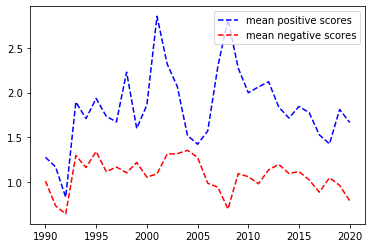

In [72]:
every_5_years = np.array(range(1990,2021,5)) # labels for x axis
plt.plot(np.array(positives), 'b--', label='mean positive scores')
plt.plot(np.array(negatives), 'r--', label='mean negative scores')
plt.xticks(np.array([0,5,10,15,20,25,30]), every_5_years)
plt.legend(loc='best')
plt.show()

In [73]:
r = np.corrcoef(positives, negatives)
r[0][1]

0.17332369990730695

#### Analysis

While it is clear that, on average, more postive words are used per meeting than negative words, it appears that there is a relatively inverse relationship between mean scores based on movements in the graph. Finding the correlation coeffcient, however, there is a slight positive correlation between scores which suggests upward trending use of words with positive/negative tagged notions being used in proportion to total words.

## <span style="color:blue"> Part 2. Regression Analysis</span> 

<b>Motivation and question:</b> In Part 1, we obtained yearly negative sentiment scores. By construction, the higher the negative score is, the more negative sentiment there was during FOMC meetings of that year. However, it is still unclear: what is negative sentiment? Because the purpose of these meetings is indeed to discuss the recent past market and economic conditions and future interest rate strategies, it would be interesting to understand <span style="color:blue">what fundamental events or indicators explain negative sentiment.</span>

<b> Additional Data found in "Indicators_DATA.csv": 
  * Column 1: <b>year</b>, 1990-2020
  * Column 2: <b>yearly negative sentiment score</b>
  * Column 3: <b>yearly litigation score</b>, constructed using FOMC meeting minutes and a "litigious" dictionary. The higher the score is, the more discussions or concerns about business lawsuits there were at the meeting.   
  * Column 4: <b>yearly ambiguity score</b>, constructed using FOMC meeting minutes and an "ambiguity" dictionary. It captures how uncertain central bankers are about their own comments, opinions, and speeches made during the meeting. This score is measured by the percentage of ambiguity words. The higher the score is, the more ambiguity there was at the meeting. 
  * Column 5: <b>yearly VIX index</b> (source: CBOE). This measure indicates stock market fear and anxiety from investors. It is usually dubbed as the "fear index" by mainstream newspapers. The higher the index is, the higher the anxiety there is in the market.  
  
As a result, to put it in a context of a regression framework, our dependent variable is the negative sentiment score (Column 2), and the three potential explanatory variables capture three different perspectives of the economy: 

   * Business litigation concerns (Column 3)
   * Ambiguity and belief (Column 4)
   * Stock market anxiety (Column 5)

### Step 1: Prep data and regression functions

In [74]:
def reg_m(y, x):
    X = np.hstack((np.ones((len(x),1)), x))     # adds column of ones to X
    results = statsmod.OLS(y, X).fit()                # creates object containing regression results
    return results

In [75]:
# Import data
DATA = np.genfromtxt("Indicators_DATA.csv", delimiter=',') # import data
DATA_n = np.array(["YEAR", "NEGSCORE","LITSCORE", "AMGSCORE", "VIX"])
DATA[:5]


array([[           nan,            nan,            nan,            nan,
                   nan],
       [1.99000000e+03, 1.27867097e+00, 4.27814660e-01, 1.06394397e+00,
        2.63800000e+01],
       [1.99100000e+03, 1.17111494e+00, 4.77659466e-01, 8.78273850e-01,
        1.93100000e+01],
       [1.99200000e+03, 8.33722372e-01, 5.75747770e-01, 1.08043680e+00,
        1.25700000e+01],
       [1.99300000e+03, 1.89470892e+00, 3.00657314e-01, 1.63873031e+00,
        1.16600000e+01]])

In [76]:
DATA = DATA[1:, :] # remove blank first line of data

In [77]:
DATA.shape

(31, 5)

In [89]:
# parsing each column
Neg_score = DATA[:, DATA_n=='NEGSCORE']
litigation = DATA[:, DATA_n=='LITSCORE']
ambiguity = DATA[:, DATA_n=='AMGSCORE']
vix = DATA[:, DATA_n=='VIX']
X = np.hstack((litigation, ambiguity, vix))

In [79]:
def extract_results(x, y):
    model = reg_m(y, x) # used for model summary
    R2 = model.rsquared # Model R-squared
    pvalue = model.pvalues # variable and constant p-values
    coefficient = model.params # coefficient estimations
    return model, R2, pvalue[1], coefficient

### Step 2: Run isolated regressions on each feature

In [80]:
# Runing univariate models to explore initial relationships
lit_neg = extract_results(litigation, Neg_score)
amb_neg = extract_results(ambiguity, Neg_score)
vix_neg = extract_results(vix, Neg_score)

In [81]:
# Summaries of each model
# Litigation Scores influencing Negative Scores
lit_neg[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     7.860
Date:                Sun, 06 Sep 2020   Prob (F-statistic):            0.00892
Time:                        10:51:39   Log-Likelihood:                -14.732
No. Observations:                  31   AIC:                             33.46
Df Residuals:                      29   BIC:                             36.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4660      0.230     10.702      0.000       1.995       2.937
x1            -2.3830      0.850     -2.804      0.009      -4.122      -0.645
==============================================================================
Omnibus:                       10.409   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                9.133
Skew:                           1.150   Prob(JB):                       0.0104
Kurtosis:                       4.335   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
# Ambiguity Scores influencing Negative Scores
amb_neg[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     4.600
Date:                Sun, 06 Sep 2020   Prob (F-statistic):             0.0405
Time:                        10:51:39   Log-Likelihood:                -16.168
No. Observations:                  31   AIC:                             36.34
Df Residuals:                      29   BIC:                             39.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7261      0.531      1.368      0.182      -0.359       1.811
x1             0.6970      0.325      2.145      0.040       0.032       1.362
==============================================================================
Omnibus:                        7.736   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                6.112
Skew:                           1.005   Prob(JB):                       0.0471
Kurtosis:                       3.833   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
#VIX index on Negativity Scores
vix_neg[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     7.384
Date:                Sun, 06 Sep 2020   Prob (F-statistic):             0.0110
Time:                        10:51:39   Log-Likelihood:                -14.934
No. Observations:                  31   AIC:                             33.87
Df Residuals:                      29   BIC:                             36.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3930      0.184      7.566      0.000       1.016       1.770
x1             0.0224      0.008      2.717      0.011       0.006       0.039
==============================================================================
Omnibus:                        1.897   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.387   Jarque-Bera (JB):                0.791
Skew:                           0.127   Prob(JB):                        0.673
Kurtosis:                       3.741   Cond. No.                         56.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# Summary Statistcs For Univariate Regressions
def stats(results, name):
    print('Variable: {}\n'
         'Coefficient: {}\n'
         'P-value: {}\n'
         'Model R-squared: {}\n'.format(name, results[3][1], results[2], results[1]))
stats(lit_neg, 'Litigation Score')
stats(amb_neg, 'Ambiguity Score')
stats(vix_neg, 'Volatility Score')

Variable: Litigation Score
Coefficient: -2.3830359526737404
P-value: 0.008921597865384188
Model R-squared: 0.21323441858149172

Variable: Ambiguity Score
Coefficient: 0.6969933563436141
P-value: 0.04047790430340607
Model R-squared: 0.13690869928974148

Variable: Volatility Score
Coefficient: 0.02238629094141416
P-value: 0.01098523620046439
Model R-squared: 0.2029413290212413



### Step 3: Run multivariate regressions in combination of the three features

In [85]:
# Regression with Litigation and Ambiguity (both statistically significant alone and have highest coefficients)
two = np.hstack((litigation, ambiguity))
reg_m(Neg_score, two).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     3.797
Date:                Sun, 06 Sep 2020   Prob (F-statistic):             0.0347
Time:                        10:51:39   Log-Likelihood:                -14.730
No. Observations:                  31   AIC:                             35.46
Df Residuals:                      28   BIC:                             39.76
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5432      1.216      2.091      0.046       0.052       5.035
x1            -2.4617      1.492     -1.650      0.110      -5.519       0.595
x2            -0.0352      0.545     -0.065      0.949      -1.151       1.081
==============================================================================
Omnibus:                       10.436   Durbin-Watson:                   1.251
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                9.169
Skew:                           1.150   Prob(JB):                       0.0102
Kurtosis:                       4.346   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# Regression with Vix and Litigation
two_2 = np.hstack((litigation, vix))
print(reg_m(Neg_score, two_2).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     8.383
Date:                Sun, 06 Sep 2020   Prob (F-statistic):            0.00140
Time:                        10:51:39   Log-Likelihood:                -11.176
No. Observations:                  31   AIC:                             28.35
Df Residuals:                      28   BIC:                             32.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9940      0.273      7.302      0.0

In [87]:
#Regression with Litigation and Ambiguity
two_3 = np.hstack((litigation, ambiguity))
print(reg_m(Neg_score, two_3).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     3.797
Date:                Sun, 06 Sep 2020   Prob (F-statistic):             0.0347
Time:                        10:51:39   Log-Likelihood:                -14.730
No. Observations:                  31   AIC:                             35.46
Df Residuals:                      28   BIC:                             39.76
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5432      1.216      2.091      0.0

In [88]:
# Multivarible Regression with all three
# X1 = litigation, X2 = ambiguity, X3 = vix
print(reg_m(Neg_score, X).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     6.896
Date:                Sun, 06 Sep 2020   Prob (F-statistic):            0.00135
Time:                        10:51:39   Log-Likelihood:                -9.6327
No. Observations:                  31   AIC:                             27.27
Df Residuals:                      27   BIC:                             33.00
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2453      1.358     -0.181      0.8

### Regression Conclusions

In analyzing the relationship of the Volatility, Ambiguity, and Litigation scores with Negative Score, we find that that the relationship varies between each variable with considerable differences in significance.  When we analyze each variable independently, we find the following relationship:

Litigation Score:
    Coefficient: -2.3830
P-value: 0.0089
Model R-squared: 0.2132

Ambiguity Score:
    Coefficient: 0.6970
P-value: 0.0405
Model R-squared: 0.1369

Volatility Score:
    Coefficient: 0.0224
P-value: 0.0110
Model R-squared: 0.20294

With each variable statistically significant at the 0.05 threshold, we can see that the negative score is most sensitive to changes in the litigation score with the coefficient greatest from zero.  The litigation score also has the largest R-squared with 21.3% of the data explained by the model.  However, this R-squared is very low, indicating that a single variable is not sufficient in representing the relationship of the negative score to the dataset.

To explore if additional variables improve the model, several multiple regressions with different combinations of each of the three variables were ran.  The results found that the inclusion of more variables indeed increases R-squared in each case, but, their significance varies.  The best model appears to be including the Litigation and Volatility variables as the inclusion of the two is the most statistically significant combination at the 0.05 threshold and a R-squared of 0.375, the highest R-squared for models where each variable is statistically significant.  While the best model, several red flags still arise as the R-squared is still fairly low to say that the model is a good fit for the data as well as loosening our significance level to a value greater than 0.05 would most likely change the model to include and exclude the variables in a different combination. This must indicate that the litigation and volatility scores are important, but, there must be additional variables that would contribute in building a better and more holistic model.

----------